|Challenge Set       |**5 **              |
|-------------------:|:-------------------|
|Topic:              |Classification      |
|Date:               |08/01/2016          | 
|Name:               |Bryant Biggs        |
|Worked with:        |N/A                 |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
 - [**Challenge 6**](#6)
 - [**Challenge 7**](#7)
 - [**Challenge 8**](#8)
 - [**Challenge 9**](#9)
 - [**Challenge 10**](#10)
 - [**Challenge 11**](#11)
 - [**Challenge 12**](#12)
---

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import urllib.request 

import pandas as pd
import numpy as np
'''
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
'''
# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

In [4]:
# Data
data = 'house-votes-84.data'
names = 'house-votes-84.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

# <a id='1'></a>Challenge 1:
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [95]:
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']
df = pd.read_csv(data, sep=',', names=columns)
df = df.replace(['y', 'n'], [1, 0]) 
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0


In [96]:
# find majority vote average and replace '?' with majority vote average (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    avg = int(round(ones/(ones+zeros), 0))
    df[col] = df[col].replace('?', avg)
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


## Answer for Challenge 1 is:
<br>
<font color='blue'>Dataframe shown above</font>

___

# <a id='2'></a>Challenge 2:
Split the data into a test and training set. Use this function:
```
from sklearn.cross_validation import train_test_split
```

In [122]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=4444)

## Answer for Challenge 2 is:

<font color='blue'>Shown directly above (one cell up)</font><br>

___

# <a id='3'></a>Challenge 3:
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

    training error
    test error
    R squared
    AIC

In [15]:
# split data set 80/20 train/test
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4444)

# put test and train data back into separate dataframes
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [16]:
# not pretty but it works
poly_1 = smf.ols(formula='y ~ 1 + x', data=train).fit()
poly_2 = smf.ols(formula='y ~ 1 + x + I(x**2)', data=train).fit()
poly_3 = smf.ols(formula='y ~ 1 + x + I(x**2) + I(x**3)', data=train).fit()
poly_4 = smf.ols(formula='y ~ 1 + x + I(x**2) + I(x**3) + I(x**4)', data=train).fit()
poly_5 = smf.ols(formula='y ~ 1 + x + I(x**2) + I(x**3) + I(x**4) + I(x**5)', data=train).fit()
poly_6 = smf.ols(formula='y ~ 1 + x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6)', data=train).fit()
poly_7 = smf.ols(formula='y ~ 1 + x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7)', data=train).fit()

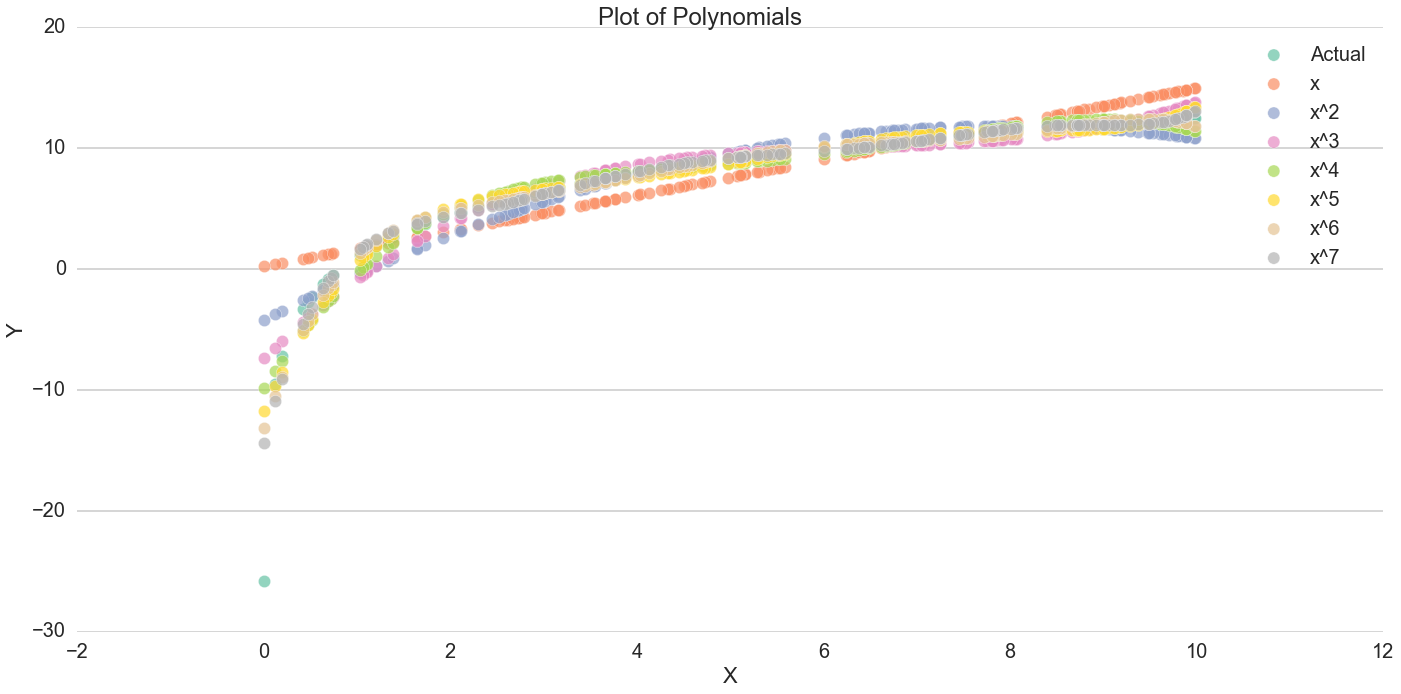

In [17]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.scatter(X_test, y_test, alpha=0.7, c=colors[0], s=150, edgecolor='w', label='Actual')

ax.scatter(X_test, poly_1.predict(X_test), alpha=0.7, c=colors[1], s=150, edgecolor='w', label='x')
ax.scatter(X_test, poly_2.predict(X_test), alpha=0.7, c=colors[2], s=150, edgecolor='w', label='x^2')
ax.scatter(X_test, poly_3.predict(X_test), alpha=0.7, c=colors[3], s=150, edgecolor='w', label='x^3')
ax.scatter(X_test, poly_4.predict(X_test), alpha=0.7, c=colors[4], s=150, edgecolor='w', label='x^4')
ax.scatter(X_test, poly_5.predict(X_test), alpha=0.7, c=colors[5], s=150, edgecolor='w', label='x^5')
ax.scatter(X_test, poly_6.predict(X_test), alpha=0.7, c=colors[6], s=150, edgecolor='w', label='x^6')
ax.scatter(X_test, poly_7.predict(X_test), alpha=0.7, c=colors[7], s=150, edgecolor='w', label='x^7')

# labels/titles
plt.legend(loc='upper right');
plt.suptitle('Plot of Polynomials')
plt.xlabel('X')
plt.ylabel('Y')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [18]:
# generate results
models = [poly_1, poly_2, poly_3, poly_4, poly_5, poly_6, poly_7]
train_err, test_err = [], []
R2, AIC = [], []

for model in models:
    # mean squared errors
    test_err.append(sum((test['y'] - model.predict(X_test))**2))
    train_err.append(sum((train['y'] - model.predict(X_train))**2))

    # r-squared
    R2.append(model.rsquared)
    
    # AIC 
    AIC.append(model.aic)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


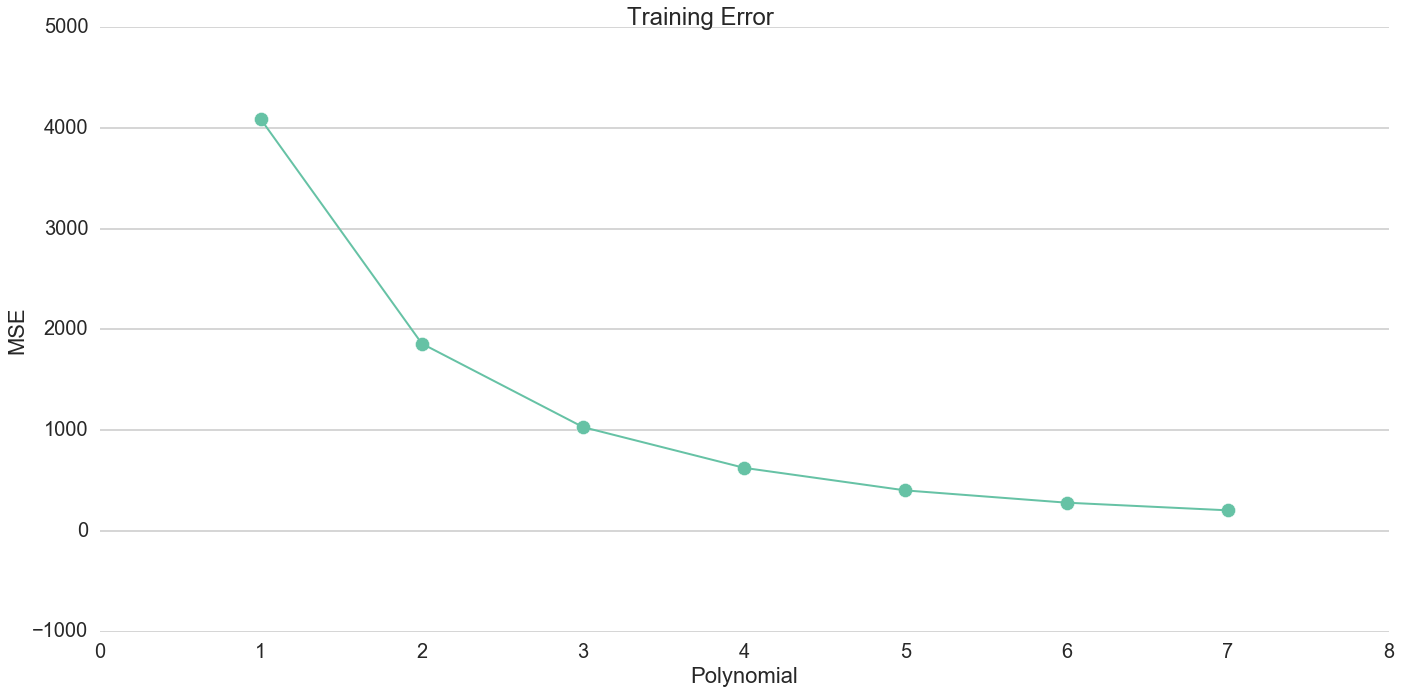

In [19]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(1,8), train_err, color=colors[0], linewidth=2.0)
ax.scatter(range(1,8), train_err, s=200, c=colors[0], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Training Error')
plt.xlabel('Polynomial')
plt.ylabel('MSE')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


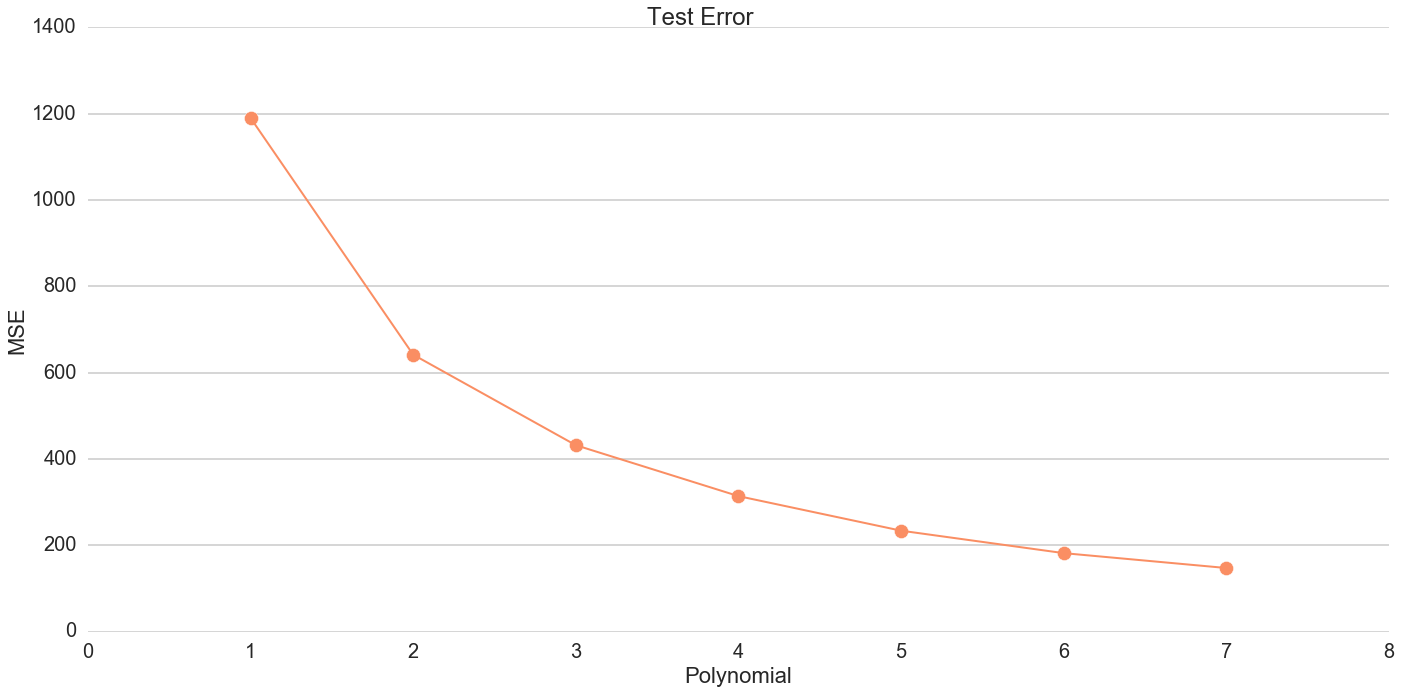

In [20]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(1,8), test_err, color=colors[1], linewidth=2.0)
ax.scatter(range(1,8), test_err, s=200, c=colors[1], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('Test Error')
plt.xlabel('Polynomial')
plt.ylabel('MSE')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


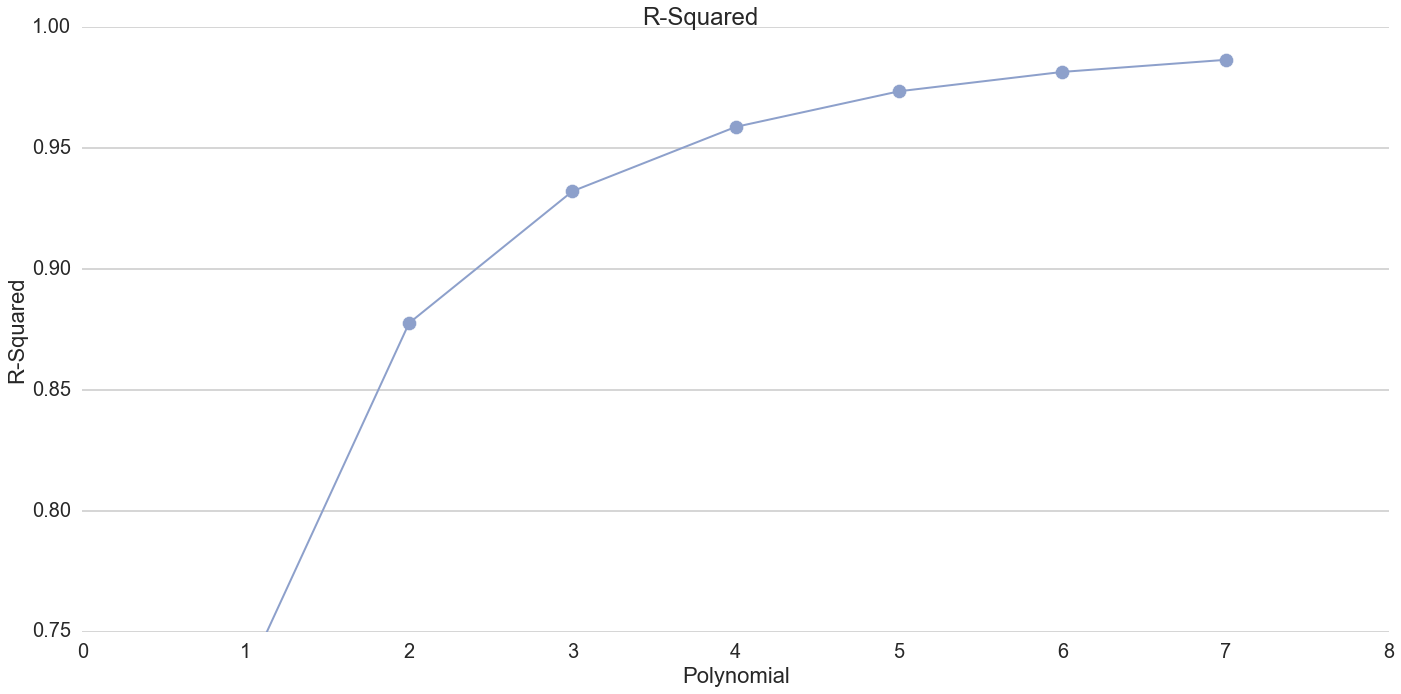

In [21]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(1,8), R2, color=colors[2], linewidth=2.0)
ax.scatter(range(1,8), R2, s=200, c=colors[2], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('R-Squared')
plt.xlabel('Polynomial')
plt.ylabel('R-Squared')

plt.ylim(0.75, 1.0)

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


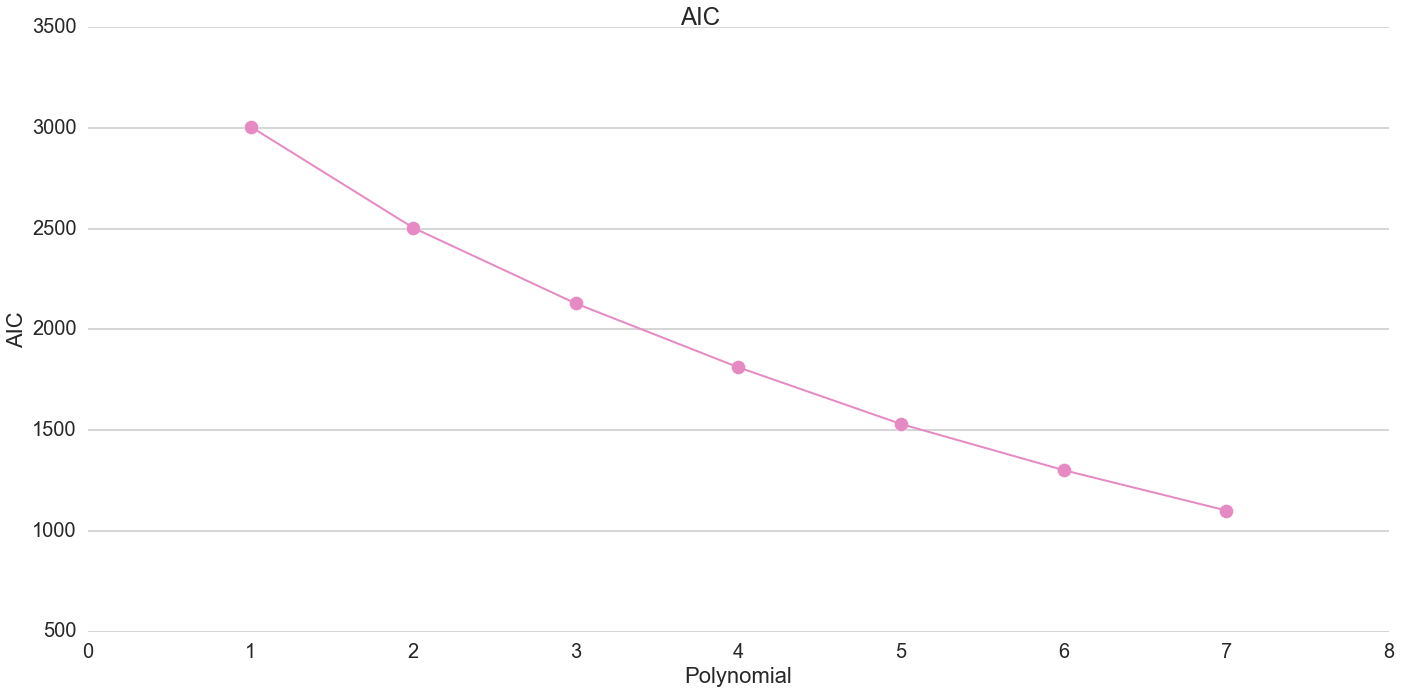

In [22]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(range(1,8), AIC, color=colors[3], linewidth=2.0)
ax.scatter(range(1,8), AIC, s=200, c=colors[3], alpha=1, edgecolor='w')

# labels/titles
plt.legend(loc='upper center');
plt.suptitle('AIC')
plt.xlabel('Polynomial')
plt.ylabel('AIC')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 3 is:
<br>
<font color='blue'>Charts shown above.</font>

___

# <a id='4'></a>Challenge 4:
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [23]:
# generate fake data
points2 = 400
epsilon = sys.float_info.epsilon * np.random.rand(points2)

B0 = 1
B1 = 5
B2 = 8

# make dataframe
data_dict_2b = {'x':np.random.rand(points2)*10}
df_2b = pd.DataFrame.from_records(data_dict_2b)
df_2b['x_sqr'] = df_2b['x']**2
df_2b['y'] = B0 + B1*df_2b['x'] + B2*df_2b['x_sqr'] + epsilon

In [24]:
# split data set 80/20 train/test
X_2b = df_2b[['x']]
y_2b = df_2b['y']

X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(X_2b, y_2b, test_size=0.20, random_state=4444)

In [25]:
train_err2b, test_err2b = [], []
num_samples = [x for x in range(5, len(X_train2b)+5,5)]

for i in num_samples:
    # linear regression model
    lrm_2b = LinearRegression()
    mdl_2b = lrm_2b.fit(X_train2b[:i], y_train2b[:i])
    
    # mean squared errors
    test_err2b.append(mean_squared_error(y_test2b[:i], mdl_2b.predict(X_test2b[:i])))
    train_err2b.append(mean_squared_error(y_train2b[:i], mdl_2b.predict(X_train2b[:i])))

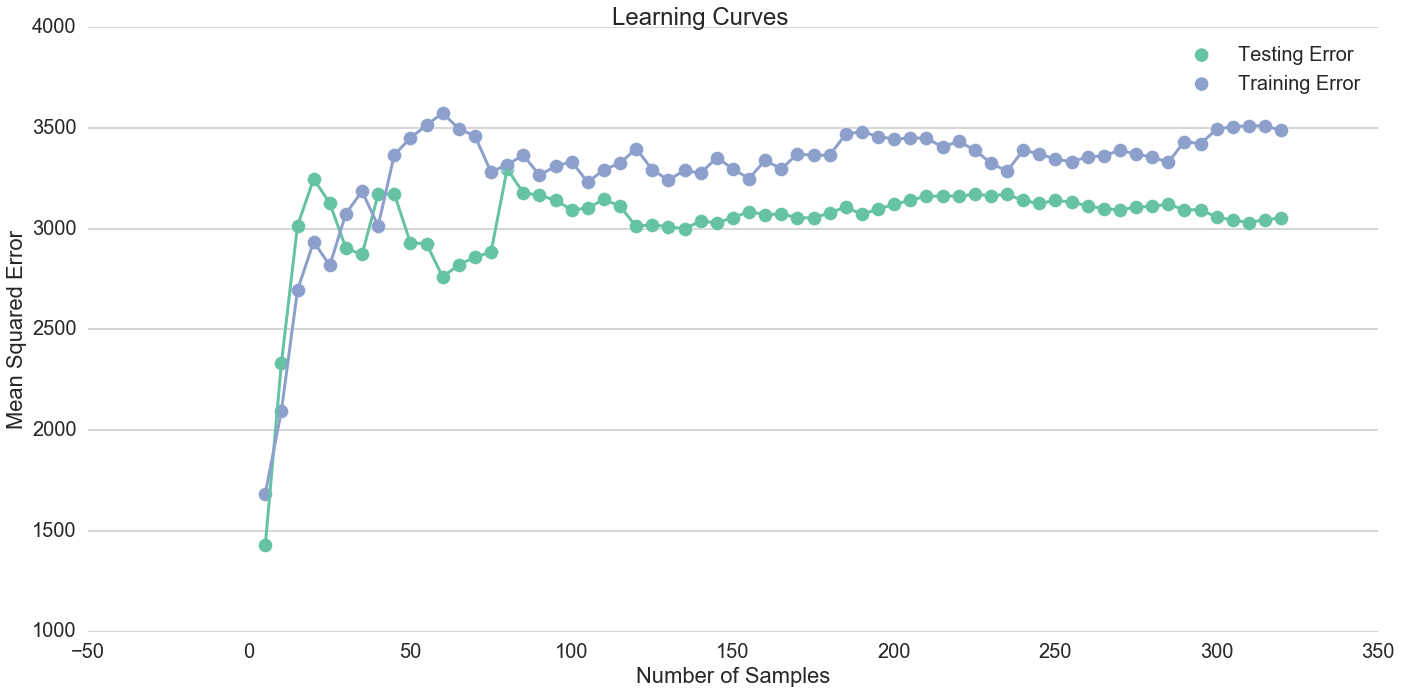

In [26]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(num_samples, test_err2b, color=colors[8], linewidth=3.0)
ax.scatter(num_samples, test_err2b, s=200, c=colors[8], alpha=1, edgecolor='w', label='Testing Error')
ax.plot(num_samples, train_err2b, color=colors[10], linewidth=3.0)
ax.scatter(num_samples, train_err2b, s=200, c=colors[10], alpha=1, edgecolor='w', label='Training Error')

# labels/titles
plt.legend(loc='upper right');
plt.suptitle('Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')

# fit plots
#plt.xlim(0,350)
#plt.ylim(0,4000)

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 4 is:

<font color='blue'>Chart shown above</font>
___